In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
noise = gpd.read_file("noise.zip")
transport_lines = gpd.read_file("transport_lines.zip")
metro_entrences = gpd.read_file("metro_entrences.zip")
roads = gpd.read_file("roads.zip")

In [ ]:
m = noise.explore(color="blue")
transport_lines.explore(m=m, color="red")

In [ ]:
roads.explore()

In [11]:
# Ensure both GeoDataFrames use the same CRS
if noise.crs != transport_lines.crs:
    transport_lines = transport_lines.to_crs(noise.crs)

# Get the bounding geometry of the noise map
#noise_bounds = noise.unary_union

# Clip the public transportation lines to the noise map extent
trimmed_transportation = gpd.clip(transport_lines, noise_bounds)

print("Original public transportation features:", len(transport_lines))
print("Trimmed public transportation features:", len(trimmed_transportation))

Original public transportation features: 805
Trimmed public transportation features: 391


In [ ]:
m = noise.explore(color="blue")
trimmed_transportation.explore(m=m, color="red")

In [4]:
if noise.crs != roads.crs:
    roads = roads.to_crs(noise.crs)

noise_bounds = noise.unary_union

# Clip the public transportation lines to the noise map extent
trimmed_roads = gpd.clip(roads, noise_bounds)

print("Original public transportation features:", len(roads))
print("Trimmed public transportation features:", len(trimmed_roads))

C:\Users\kajet\AppData\Local\Temp\ipykernel_3900\1486340565.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  noise_bounds = noise.unary_union


Original public transportation features: 49749
Trimmed public transportation features: 49477


In [ ]:
m = noise.explore(color="blue")
trimmed_roads.explore(m=m, color="red")

In [14]:
noise

,DB_LO,DB_HI,SHAPE_LEN,geometry
0,5.0,10.0,7.617187e+05,"MULTIPOLYGON (((-733950.04 -1034130, -733950 -..."
1,10.0,15.0,8.163733e+05,"MULTIPOLYGON (((-733950.905 -1034130, -733950 ..."
2,15.0,20.0,8.648527e+05,"MULTIPOLYGON (((-733951.77 -1034130, -733950 -..."
3,20.0,25.0,9.233291e+05,"MULTIPOLYGON (((-733952.635 -1034130, -733950 ..."
4,25.0,30.0,1.016043e+06,"MULTIPOLYGON (((-733953.501 -1034130, -733950 ..."
5,30.0,35.0,1.280995e+06,"MULTIPOLYGON (((-733954.366 -1034130, -733950 ..."
6,35.0,40.0,2.186663e+06,"MULTIPOLYGON (((-733955.231 -1034130, -733950 ..."
7,40.0,45.0,3.608083e+06,"MULTIPOLYGON (((-733956.097 -1034130, -733950 ..."
8,45.0,50.0,4.391242e+06,"MULTIPOLYGON (((-733956.962 -1034130, -733950 ..."
9,50.0,55.0,4.295783e+06,"MULTIPOLYGON (((-733957.827 -1034130, -733950 ..."


In [24]:
noise.shape

(18, 4)

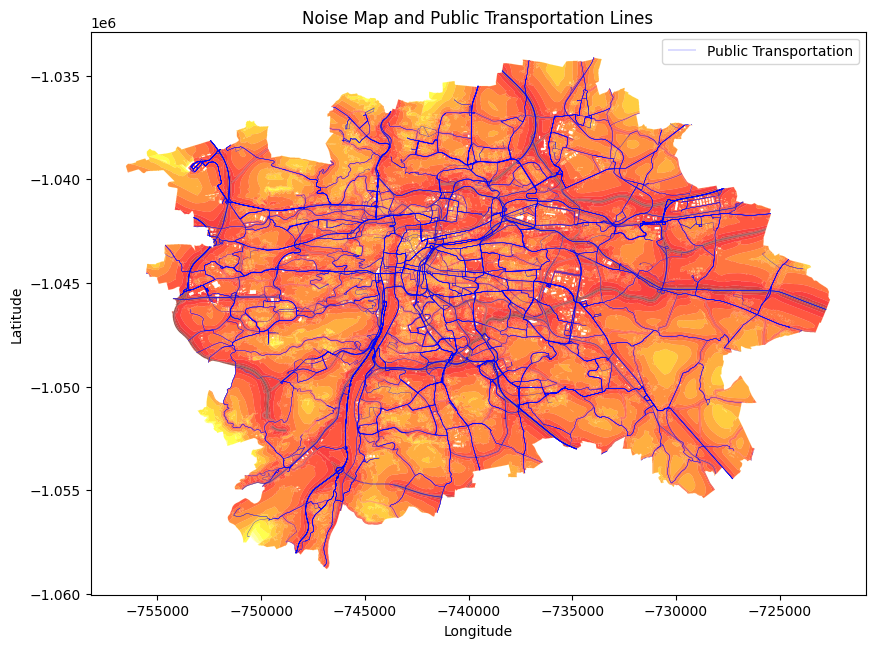

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the public transportation lines
trimmed_transportation.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

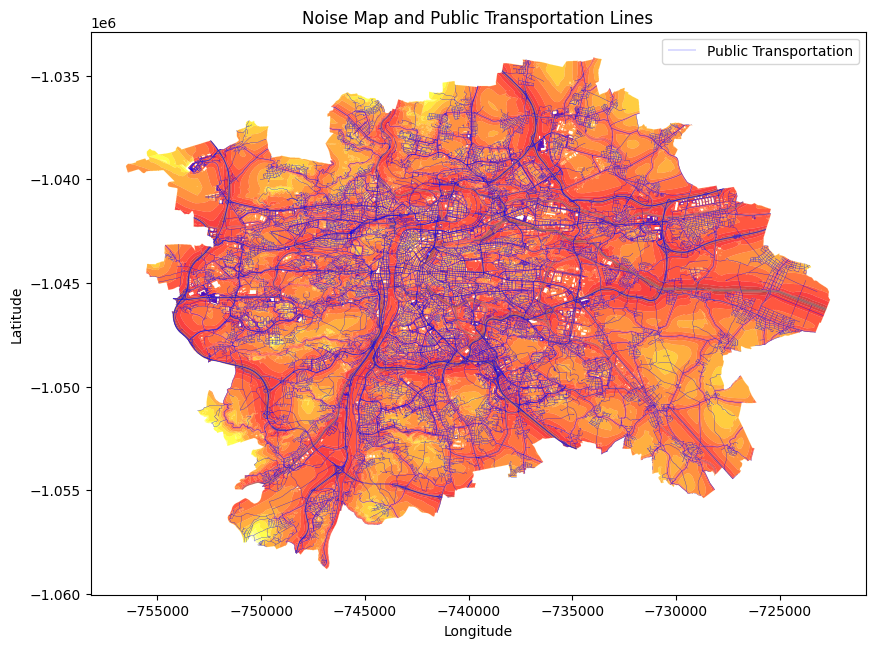

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the public transportation lines
trimmed_roads.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

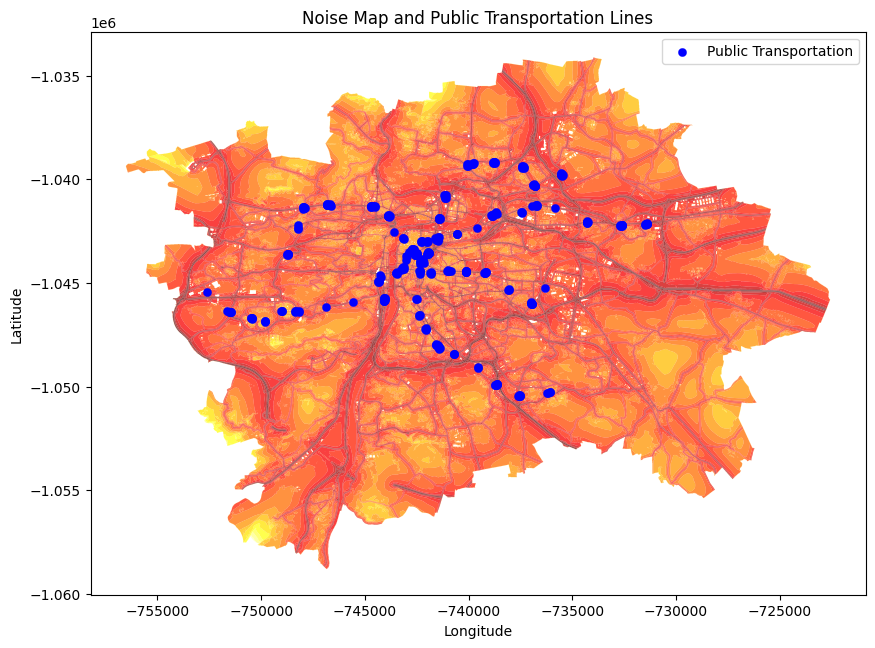

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the public transportation lines
metro_entrences.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [29]:
trimmed_roads

,USEK_NAZ,DALNICE,TRIDASIL,TRIDAMK,TYPKOMUNIK,GLOBALID,MKN,SMEROVOST,SHAPE_LEN,geometry
34512,pokračování-pokračování,0,1,0,11,{70524D00-4586-46ED-BC91-A1262FA7751D},Na Baních,2,32.649655,"LINESTRING (-748272 -1058025, -748297 -1058046)"
34511,pokračování-Strakonická,0,1,0,11,{30659C84-567C-4D8C-A9F9-0D4E4B0D8F80},Na Baních,1,54.548647,"LINESTRING (-748272 -1058025, -748291.11 -1058..."
33820,Jílovišťská-Jílovišťská,0,1,0,13,{F92D8FC8-CEB5-4AEB-A2D6-4AD6F6C679F2},Strakonická,2,85.442282,"LINESTRING (-748337.378 -1058022.589, -748322...."
38969,pokračování-Strakonická,0,1,0,11,{E6AA76F5-8A49-4F91-B4AC-01AD7C1DC7D0},Jílovišťská,1,81.442925,"LINESTRING (-748345 -1057958, -748336 -1057977..."
34509,pokračování-pokračování,0,1,0,11,{411AAD20-E4B3-4ECB-A3E2-AE5EB013DD39},Na Baních,0,86.718815,"LINESTRING (-748208.89 -1057965.97, -748214 -1..."
...,...,...,...,...,...,...,...,...,...,...
33528,pokračování-Schoellerova,0,0,2,3,{B66A8D1C-9C3D-4E40-A6BA-BD26319C3238},Za tratí,0,34.472925,"LINESTRING (-734487.5 -1034964.83, -734481.87 ..."
16900,Za tratí-Za tratí,0,0,2,1,{67A8A096-A0B7-47F8-A22F-61C4DD0AEB74},Schoellerova,0,93.936898,"LINESTRING (-734457.69 -1034970.34, -734474.17..."
33530,Schoellerova-pokračování,0,0,2,3,{9FE4FB4D-7110-4E30-858B-27780479BB00},Za tratí,1,88.063734,"LINESTRING (-734474.17 -1034877.86, -734477.75..."
16978,Za tratí-NN7588,0,0,2,3,{88C1CBFF-A244-44B7-BA46-FB04D30F913F},Schoellerova,0,544.981645,"LINESTRING (-734474.17 -1034877.86, -734498.66..."


In [43]:
trimmed_roads['DALNICE'].unique()

array([0, 1], dtype=int32)

In [45]:
trimmed_roads['TRIDASIL'].unique()

array([1, 0, 2, 3], dtype=int32)

In [51]:
trimmed_roads['TRIDAMK'].unique()

array([0, 3, 4, 2, 1], dtype=int32)

In [36]:
trimmed_roads['TYPKOMUNIK'].unique()

array([11, 13, 37,  3,  1,  0, 33, 15, 27,  8, 19, 20, 14, 10, 35, 46, 45,
        9, 23, 21, 18, 31, 44, 26, 30,  5, 32, 22, 40, 43, 28, 12, 36, 34,
       39, 42, 16,  6,  4, 38, 25, 17,  2,  7, 24, 29], dtype=int32)

C:\Users\kajet\AppData\Local\Temp\ipykernel_3900\960448737.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


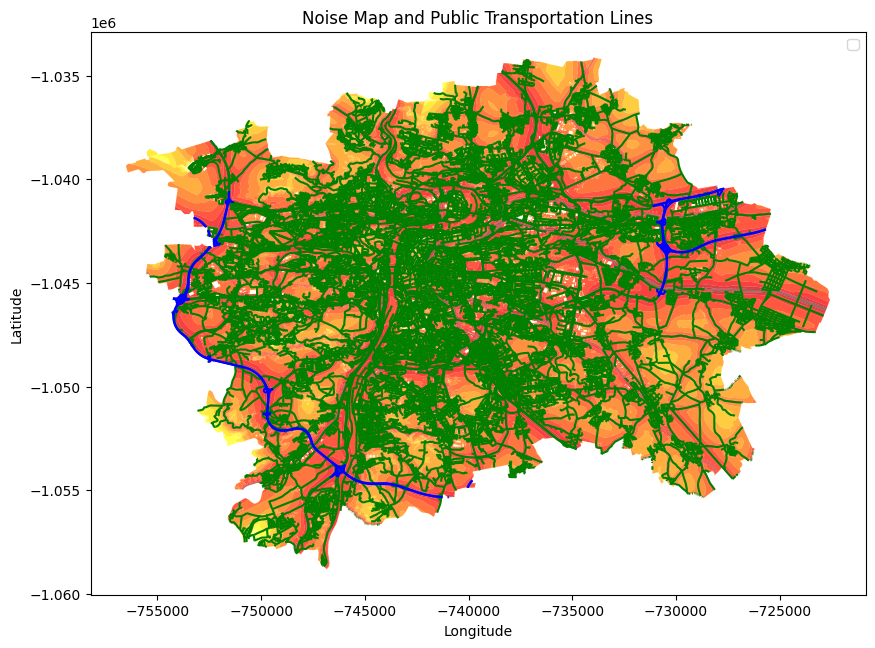

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")

noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

for value, group in trimmed_roads.groupby("DALNICE"):  # Replace 'ROAD_TYPE' with your column name
    label = "Highway" if value == 1 else "Other Roads"
    group.plot(
        ax=ax,
        color="blue" if value == 1 else "green",  # Different colors for each group
        linewidth=1.5,  # Adjust line width
    )
# Plot the public transportation lines
#metro_entrences.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [47]:
colors = {0: "green", 1: "blue", 2: "pink", 3: "black"}

C:\Users\kajet\AppData\Local\Temp\ipykernel_3900\3554081094.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


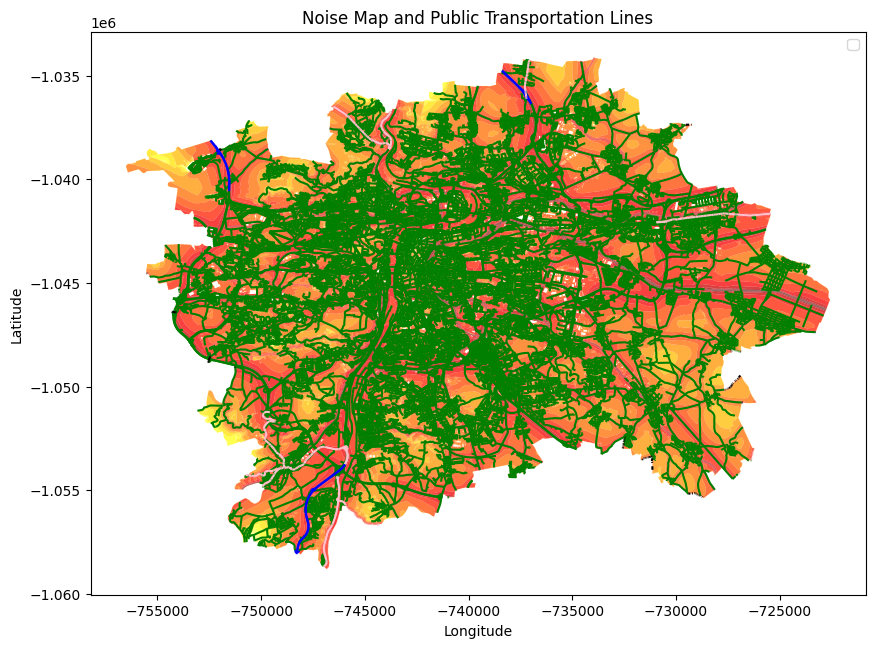

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")

noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

for value, group in trimmed_roads.groupby("TRIDASIL"):
    group.plot(
        ax=ax,
        color=colors.get(value, "gray"),  # Assign color based on the value
        linewidth=1.5,
    )
# Plot the public transportation lines
#metro_entrences.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [52]:
colors = {0: "green", 1: "blue", 2: "pink", 3: "black", 4: "purple"}

C:\Users\kajet\AppData\Local\Temp\ipykernel_3900\1838012715.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


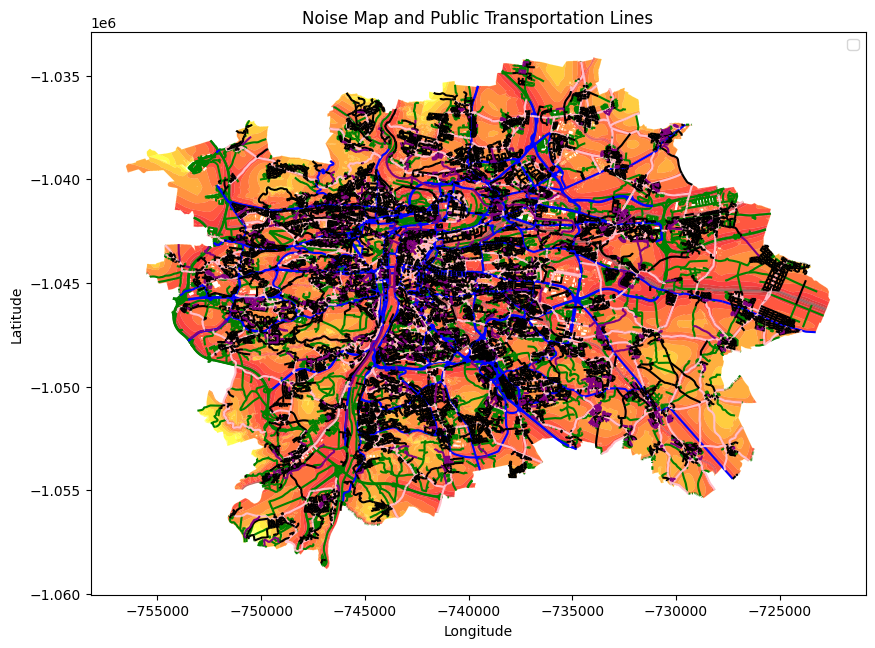

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")

noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

for value, group in trimmed_roads.groupby("TRIDAMK"):
    group.plot(
        ax=ax,
        color=colors.get(value, "gray"),  # Assign color based on the value
        linewidth=1.5,
    )
# Plot the public transportation lines
#metro_entrences.plot(ax=ax, color="blue", linewidth=0.2, label="Public Transportation")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()